In [281]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [282]:
import numpy as np
import pandas as pd

In [283]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [284]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text, distinct

In [285]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [286]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [287]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [288]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [289]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Precipitation Analysis

In [290]:
inspector = inspect(engine)
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


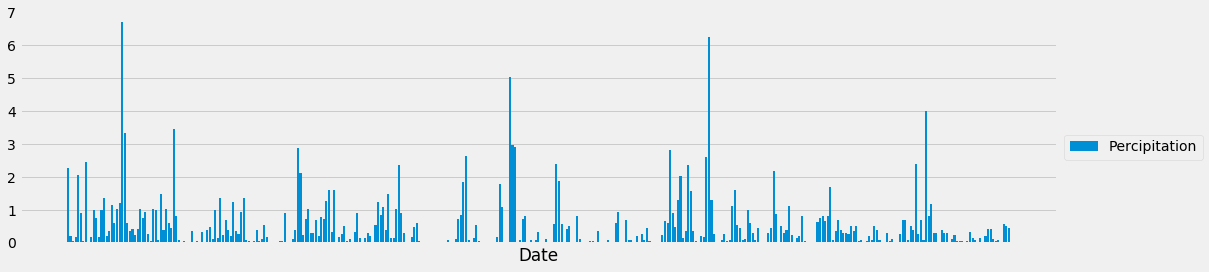

In [405]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
maxd = datetime.datetime.strptime(session.query(func.max(Measurement.date)).scalar(), '%Y-%m-%d')
lastYear = maxd - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
date_prcp = session.query(*sel).\
    filter (Measurement.date<maxd).\
    filter (Measurement.date>lastYear).\
    order_by(Measurement.date).all()
date_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp)
date_prcp_df

# dropping all rows with NA values
date_prcp_df.dropna(axis=0,how='any',inplace=True)

# Sort the dataframe by date
date_prcp_df.sort_values(by=['date'])
date_prcp_df.set_index('date', inplace=True)
date_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,4))
plt.bar(date_prcp_df.index, date_prcp_df["prcp"])
plt.xticks([])
plt.xlabel("Date")
plt.ylim([0,7])
plt.tight_layout()
plt.legend(['Percipitation'], loc=2,bbox_to_anchor=(1, .5))
plt.show()
plt.savefig("Percipitation.jpg",bbox_inches = "tight")

![precipitation](Images/precipitation.png)

In [292]:
#Summary statistics for the precipitation data
pd.to_numeric(date_prcp_df.prcp)
date_prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

## Station Analysis

In [293]:
# Design a query to show how many stations are available in this dataset?
uq_station = session.query(func.count(distinct(Station.station))).scalar()
uq_station

9

In [315]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_msmt_cnt = session.query(Station.station, func.count(Measurement.station)).\
                                 filter (Station.station == Measurement.station).\
                                 group_by(Station.station).\
                                order_by(func.count(Measurement.station).desc()).all()
station_msmt_cnt

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [332]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

actv_stn_stats = session.query(func.max(Measurement.prcp).label("Maximum Temp"), func.min(Measurement.prcp).label("Minimum Temp"), func.avg(Measurement.prcp).label("Average Temp")).\
                                 filter(Measurement.station == station_msmt_cnt[0].station).all()

actv_stn_stats

actv_stn_stats_df = pd.DataFrame(actv_stn_stats)
actv_stn_stats_df

,Maximum Temp,Minimum Temp,Average Temp
0,9.64,0.0,0.212352


In [338]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date 1 year ago from the last data point in the database
maxd_stn = datetime.datetime.strptime(session.query(func.max(Measurement.date)).filter(Measurement.station == station_msmt_cnt[0].station).scalar(), '%Y-%m-%d')
lastYear_stn = maxd - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.tobs]
date_prcp_stn = session.query(*sel).\
    filter(Measurement.date<maxd_stn).\
    filter(Measurement.date>lastYear_stn).\
    order_by(Measurement.date).all()
date_prcp_stn

#converting queried data into dataframe
date_prcp_stn_df = pd.DataFrame(date_prcp_stn)
date_prcp_stn_df



,date,tobs
0,2016-08-24,79.0
1,2016-08-24,76.0
2,2016-08-24,80.0
3,2016-08-24,78.0
4,2016-08-24,79.0
5,2016-08-24,77.0
6,2016-08-24,74.0
7,2016-08-25,80.0
8,2016-08-25,77.0
9,2016-08-25,81.0


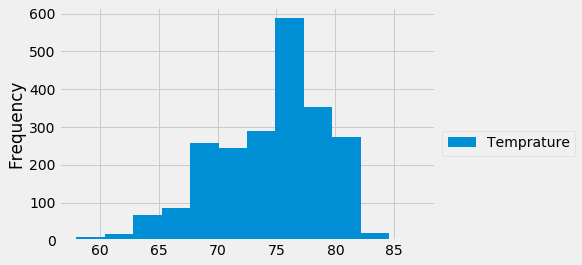

In [345]:
plt.hist(date_prcp_stn_df["tobs"], bins = 12)
plt.ylabel("Frequency")
plt.legend(['Temprature'], loc=2,bbox_to_anchor=(1, .5))
plt.show()
plt.savefig("Temprature.jpg",bbox_inches = "tight")

![precipitation](Images/station-histogram.png)

# Temperature Analysis

In [359]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
# print(calc_temps('2012-02-28', '2012-03-05'))

In [360]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
start_date = datetime.datetime.strptime('2018-05-30', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2018-06-08', '%Y-%m-%d')

start_date_ly = start_date - datetime.timedelta(days=365)
end_date_ly = end_date - datetime.timedelta(days=365)

trip_temp_stats = calc_temps(start_date_ly, end_date_ly)
trip_temp_stats

# for your trip using the previous year's data for those same dates.
trip_temp = session.query(Measurement.tobs).\
        filter(Measurement.date >= start_date_ly).filter(Measurement.date <= end_date_ly).all()
trip_temp

[(79.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (80.0),
 (79.0),
 (79.0),
 (80.0),
 (76.0),
 (76.0),
 (76.0),
 (76.0),
 (78.0),
 (76.0),
 (75.0),
 (75.0),
 (76.0),
 (81.0),
 (81.0),
 (78.0),
 (80.0),
 (79.0),
 (81.0),
 (80.0),
 (81.0),
 (79.0),
 (79.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (79.0),
 (79.0),
 (81.0),
 (79.0),
 (81.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (75.0),
 (80.0),
 (76.0),
 (76.0),
 (77.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (74.0),
 (74.0),
 (77.0),
 (74.0),
 (74.0),
 (79.0),
 (75.0)]

In [369]:
# results to be plotted
trip_temp_stats

[(74.0, 77.7719298245614, 81.0)]

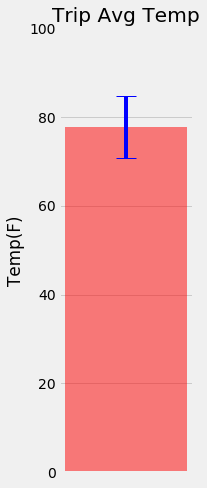

In [407]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Create Arrays for the plot
x_tick = ['AvgTemp']
x_pos = np.arange(len(x_tick))
mean = [trip_temp_stats[0][1]]
error = (trip_temp_stats[0][2] - trip_temp_stats[0][0])

plt.figure(figsize=(3,7))
plt.bar(x_pos, mean, yerr=error, color = 'r', width = .01, align='center', alpha=0.5, ecolor='b', capsize=10)

plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylim(0, 100)

# Save the figure and show
plt.tight_layout()
plt.savefig('Trip Avg Temp.png')
plt.show()


In [415]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_msmt_cnt = session.query(Station.name,Station.latitude,Station.longitude,Station.elevation, Measurement.prcp).\
                filter(Measurement.date >= start_date_ly).filter(Measurement.date <= end_date_ly).\
                filter (Station.station == Measurement.station).\
                order_by(Measurement.prcp.desc()).all()
station_msmt_cnt

station_msmt_cnt_df = pd.DataFrame(station_msmt_cnt)
station_msmt_cnt_df

,name,latitude,longitude,elevation,prcp
0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.82
1,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.25
2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.20
3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.16
4,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.15
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.15
6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.15
7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.13
8,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.10
9,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.10


# Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
